<a href="https://colab.research.google.com/github/Himangi-77/Overdose-AI-Assignment/blob/main/Overdose_AI_movieReplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/movieReplicationSet.csv')
data.head(10)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
5,3.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,NaN,4.0,...,4.0,4.0,1.0,4.0,5.0,3.0,1.0,1.0,1,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,1.0,5.0,3.0,5.0,5.0,4.0,3.0,1.0,0,0
7,3.5,NaN,3.5,2.5,3.0,3.0,3.0,3.5,4.0,4.0,...,4.0,5.0,3.0,5.0,5.0,4.0,3.0,1.0,0,1
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,3.0,6.0,5.0,1.0,3.0,1.0,0,1
9,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,4.0,3.0,5.0,5.0,3.0,2.0,2.0,-1,1


In [3]:
data.shape

(1097, 477)

In [6]:
movieratings = data.iloc[:,0:400]
movieratings.head(10)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
5,3.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,NaN,4.0,...,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.5,NaN,3.5,2.5,3.0,3.0,3.0,3.5,4.0,4.0,...,2.0,3.5,4.0,3.5,4.0,NaN,3.5,4.0,4.0,3.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,...,4.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


**Impute the missing ratings with a blend (50:50) of the arithmetic mean of each column and each row. (Let’s say that the rating of user 350 for movie 200 is missing and that the average rating of this user for other movies is 4 and the average rating (by other users) for this movie is 3, then the to-be-imputed rating would be 3.5, using this method.)**

In [7]:
import numpy as np

def blend_impute(df):
    # calculate the mean of each row and each column
    row_mean = df.mean(axis=1)
    col_mean = df.mean(axis=0)

    # loop through each missing rating and impute it with a blend of the row and column means
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(df.iloc[row, col]):
                row_val = row_mean.iloc[row]
                col_val = col_mean.iloc[col]
                blend_val = (row_val + col_val) / 2
                df.iloc[row, col] = blend_val

    return df

# impute missing ratings
df_imputed = blend_impute(movieratings)


In [8]:
df_imputed

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.057031,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,4.000000,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.023296,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.152344,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294


**For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that predicts ratings the best. Then report the average COD (Coefficient of determination) of those 400 simple linear regression models. Please include a histogram of these 400 COD (Coefficient of determination) values and a table with the 10 movies that are most easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict from the ratings of a single other movie (and their associated COD (Coefficient of determination) values, as well as which movie ratings are the best predictor, so this table should have 3 columns).**

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
ratings_df = df_imputed


In [24]:
ratings_df=ratings_df.dropna(thresh=1)
ratings_df.isnull().sum()

The Life of David Gale (2003)                0
Wing Commander (1999)                        0
Django Unchained (2012)                      0
Alien (1979)                                 0
Indiana Jones and the Last Crusade (1989)    0
                                            ..
Patton (1970)                                0
Anaconda (1997)                              0
Twister (1996)                               0
MacArthur (1977)                             0
Look Who's Talking (1989)                    0
Length: 400, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

cods = []

for movie in ratings_df.columns:
    X = ratings_df.drop(columns=[movie]).values
    y = ratings_df[movie].values
    cod_list = []
    
    for i in range(399):
        lr = LinearRegression()
        lr.fit(X[:, i].reshape(-1, 1), y)
        y_pred = lr.predict(X[:, i].reshape(-1, 1))
        cod_list.append(r2_score(y, y_pred))
    
    best_cod = max(cod_list)
    cods.append(best_cod)


Average COD: 0.42378171067196035


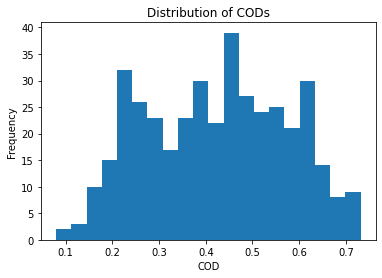

In [31]:
import numpy as np
import matplotlib.pyplot as plt

avg_cod = np.mean(cods)
print("Average COD:", avg_cod)

plt.hist(cods, bins=20)
plt.title("Distribution of CODs")
plt.xlabel("COD")
plt.ylabel("Frequency")
plt.show()


In [36]:
cod_sorted = sorted(enumerate(cods), key=lambda x: x[1])
easiest_movies = [(ratings_df.columns[i], cod) for i, cod in cod_sorted[:10]]
hardest_movies = [(ratings_df.columns[i], cod) for i, cod in cod_sorted[-10:]]
print("Easiest movies to predict:", easiest_movies)
print("Hardest movies to predict:", hardest_movies)


Easiest movies to predict: [('Avatar (2009)', 0.07948469093084642), ('Interstellar (2014)', 0.11134259626426413), ('Black Swan (2010)', 0.11708033979272658), ('Clueless (1995)', 0.141426437225317), ('The Cabin in the Woods (2012)', 0.14388686955485086), ('La La Land (2016)', 0.14851372649350147), ('Titanic (1997)', 0.15413567330482103), ('13 Going on 30 (2004)', 0.16016372820860836), ('The Fast and the Furious (2001)', 0.1689914228239079), ('Grown Ups 2 (2013)', 0.17111918539600857)]
Hardest movies to predict: [('Heavy Traffic (1973)', 0.6927335239652475), ('The Final Conflict (1981)', 0.7001881161214467), ('Congo (1995)', 0.7005689836445022), ('The Straight Story (1999)', 0.7005689836445022), ('The Bandit (1996)', 0.7112222468014325), ('Best Laid Plans (1999)', 0.7112222468014325), ('The Lookout (2007)', 0.7135542589926913), ('Patton (1970)', 0.7135542589926913), ('Erik the Viking (1989)', 0.731507476731657), ('I.Q. (1994)', 0.731507476731657)]


In [38]:
easiest_df = pd.DataFrame(easiest_movies, columns=['Movie', 'R2 Score'])
hardest_df = pd.DataFrame(hardest_movies, columns=['Movie', 'R2 Score'])

In [39]:
easiest_df

,Movie,R2 Score
0,Avatar (2009),0.079485
1,Interstellar (2014),0.111343
2,Black Swan (2010),0.117080
3,Clueless (1995),0.141426
4,The Cabin in the Woods (2012),0.143887
5,La La Land (2016),0.148514
6,Titanic (1997),0.154136
7,13 Going on 30 (2004),0.160164
8,The Fast and the Furious (2001),0.168991
9,Grown Ups 2 (2013),0.171119


Text(0.5, 1.0, 'Movies easeiest to predict')

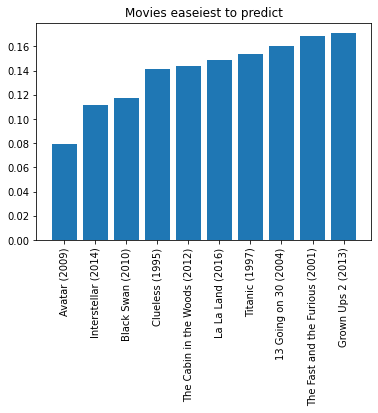

In [46]:
plt.bar(easiest_df['Movie'],easiest_df['R2 Score'])
plt.xticks(rotation=90)
plt.title('Movies easeiest to predict')

In [40]:
hardest_df

,Movie,R2 Score
0,Heavy Traffic (1973),0.692734
1,The Final Conflict (1981),0.700188
2,Congo (1995),0.700569
3,The Straight Story (1999),0.700569
4,The Bandit (1996),0.711222
5,Best Laid Plans (1999),0.711222
6,The Lookout (2007),0.713554
7,Patton (1970),0.713554
8,Erik the Viking (1989),0.731507
9,I.Q. (1994),0.731507


Text(0.5, 1.0, 'Movies hardest to predict')

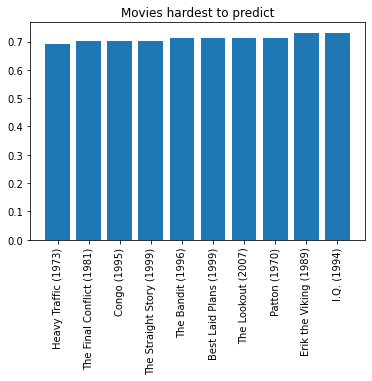

In [47]:
plt.bar(hardest_df['Movie'],hardest_df['R2 Score'])
plt.xticks(rotation=90)
plt.title('Movies hardest to predict')